In [24]:
#Step 1: Load Data into Pandas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("C:\\Users\\Shreyash Tilekar\\OneDrive\\Documents\\DataAnalyticsProjects\\data.csv", encoding='unicode_escape')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#STEP 2: Data Exploration

# Check shape and info
print(df.shape)
df.info()

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Check for missing values
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
#STEP 3: Data Cleaning

# Remove rows with missing Customer ID
df = df.dropna(subset=['CustomerID'])

In [12]:
# Remove negative quantities (cancellations)
df = df[df['Quantity'] > 0]

In [13]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
# Create a new column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


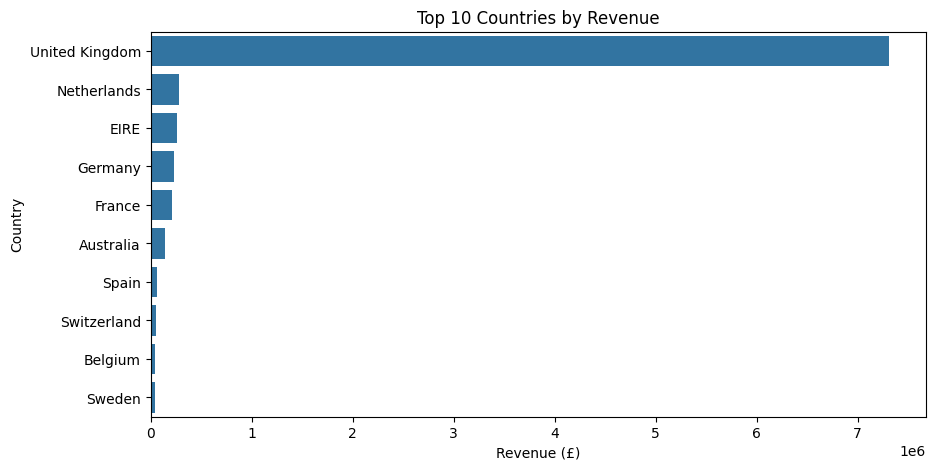

In [17]:
#STEP 4: Exploratory Data Analysis (EDA)
#Top 10 Countries by Revenue

country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Country")
plt.show()

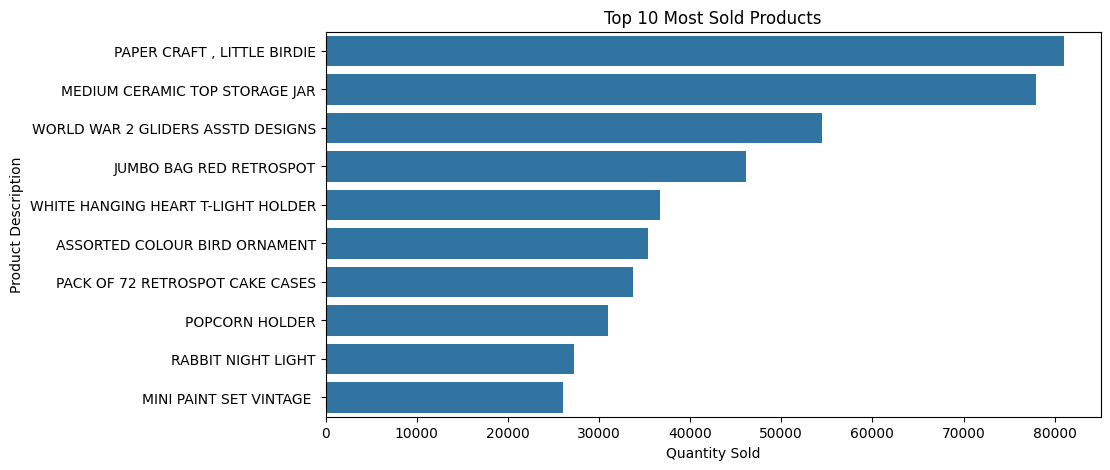

In [18]:
#Top 10 Products Sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()

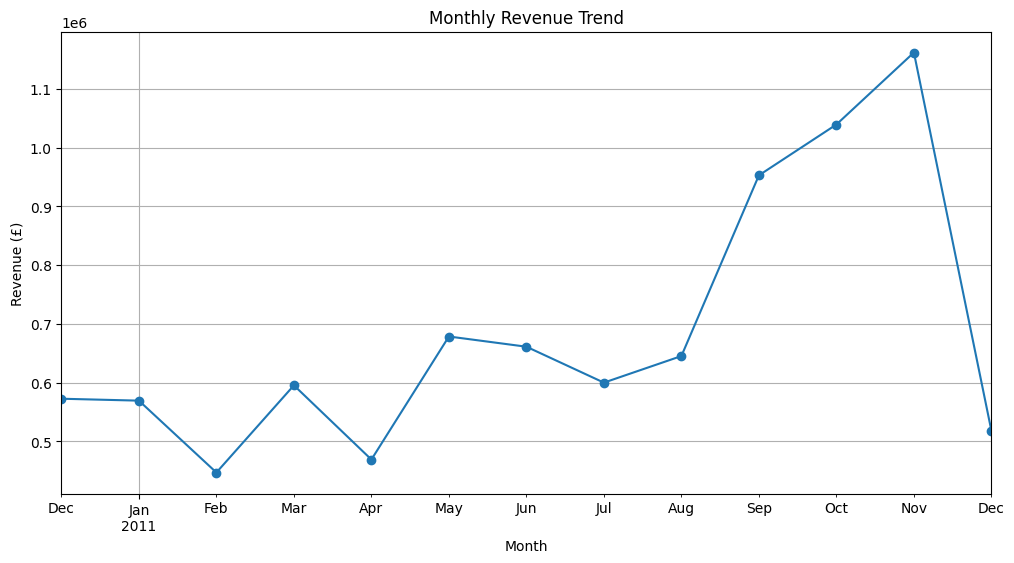

In [19]:
#Monthly Revenue Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()

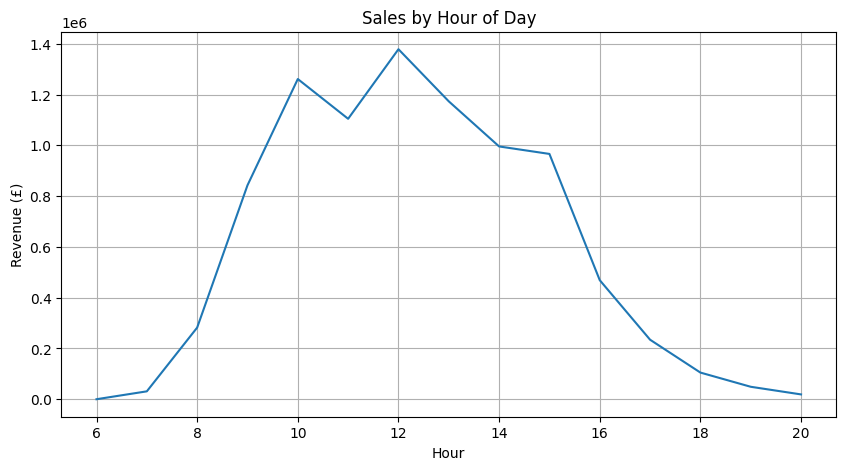

In [20]:
#Sales by Hour of the Day
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()

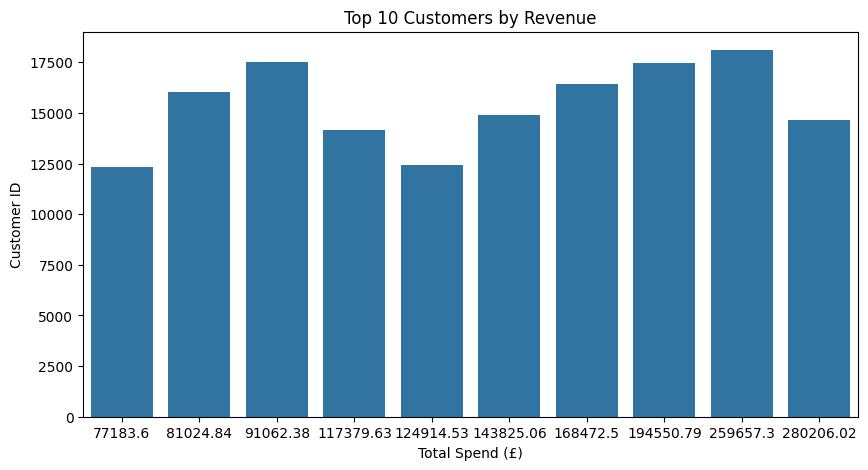

In [21]:
#Most Valuable Customers
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Spend (£)")
plt.ylabel("Customer ID")
plt.show()

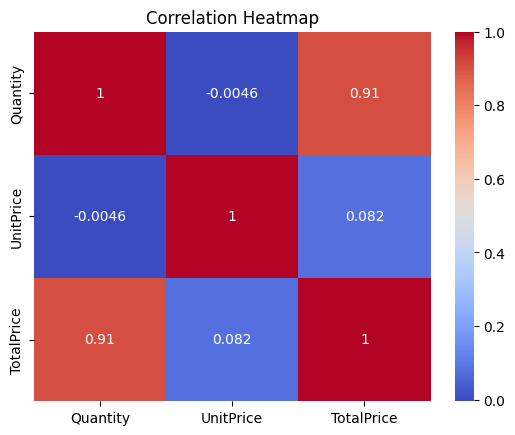

In [22]:
#STEP 5: Correlation Analysis

sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
#STEP 6: Insights

print("""
✅ Key Insights:
1. United Kingdom generates the highest revenue.
2. Specific gift and decorative items are top-selling products.
3. Peak sales occur around November–December (holiday season).
4. Most purchases happen between 10 AM and 3 PM.
5. A few loyal customers contribute significantly to total revenue.
""")


✅ Key Insights:
1. United Kingdom generates the highest revenue.
2. Specific gift and decorative items are top-selling products.
3. Peak sales occur around November–December (holiday season).
4. Most purchases happen between 10 AM and 3 PM.
5. A few loyal customers contribute significantly to total revenue.

